In [3]:
import pandas as pd 
df = pd.read_csv("credit_score_data.csv")

In [4]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [17]:
df['Credit Score'].unique()


array([], dtype=float64)

In [16]:
df['Credit_Score_Label'] = (df['Credit Score'] < 600).astype(int)


In [18]:
# One-hot encode all categorical columns except target
categorical_cols = ['Gender', 'Education', 'Marital Status', 'Home Ownership']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your CSV (make sure filename is correct)
df = pd.read_csv("credit_score_data.csv")

# Step 1: Map Credit Score categories to binary labels
# Assuming only 'High' and others (like 'Low', 'Medium')
df['Credit_Score_Label'] = df['Credit Score'].apply(lambda x: 0 if x == 'High' else 1)

# Step 2: One-hot encode categorical variables
categorical_cols = ['Gender', 'Education', 'Marital Status', 'Home Ownership']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Define features and target
X = df_encoded.drop(columns=['Credit Score', 'Credit_Score_Label'])
y = df_encoded['Credit_Score_Label']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Now you can train your classification model!


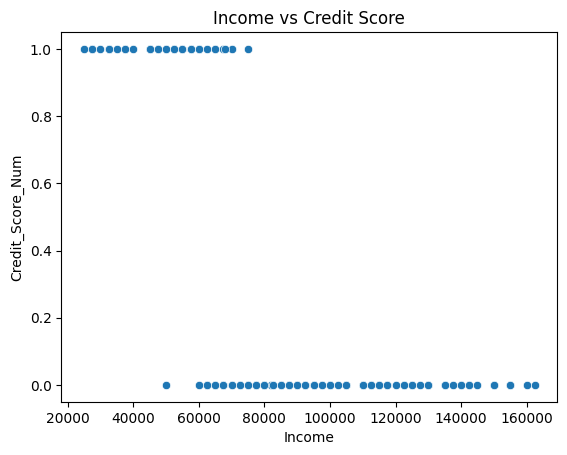

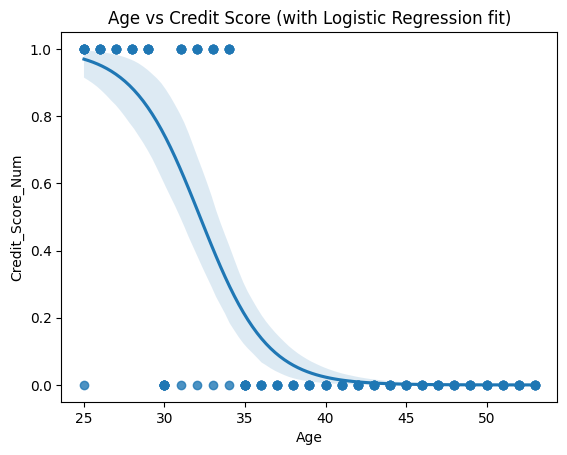

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# If Credit Score is categorical, use numeric mapping first
df['Credit_Score_Num'] = df['Credit Score'].apply(lambda x: 1 if x != 'High' else 0)

# Scatter plot: Income vs Credit Score (numeric)
sns.scatterplot(data=df, x='Income', y='Credit_Score_Num')
plt.title('Income vs Credit Score')
plt.show()

# Regression plot: Age vs Credit Score (numeric)
sns.regplot(data=df, x='Age', y='Credit_Score_Num', logistic=True)
plt.title('Age vs Credit Score (with Logistic Regression fit)')
plt.show()
